# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.shape

(27028, 69)

In [5]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [6]:
sinasc_raw.isnull().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_1 = sinasc_raw[['munResLat' , 'CONSULTAS' , 'QTDFILVIVO' , 'IDADEPAI']].dropna()

In [8]:
sinasc_1

,munResLat,CONSULTAS,QTDFILVIVO,IDADEPAI
0,-11.93554,4,0.0,26.0
1,-11.93554,4,1.0,24.0
2,-11.93554,4,2.0,32.0
3,-12.13178,3,0.0,24.0
4,-11.93554,4,1.0,27.0
...,...,...,...,...
27021,-13.13056,4,1.0,38.0
27022,-12.74137,4,0.0,33.0
27023,-12.74137,4,1.0,35.0
27025,-12.74137,4,0.0,30.0


In [9]:
fx_lat = [-float('inf') , -10.5 , float('inf')] #Criando faixas de float negativo infinito até float infinito.
rotulos = ['Inferior' , 'Superior'] #Definindo nome dos labels
funcoes = ['sum', 'mean', 'max', 'min', 'median', 'std', 'var'] # Lista de funções para o aggfunc

In [10]:
sinasc_lat = pd.cut(sinasc_1['munResLat'] , 
                    bins = fx_lat , 
                    labels = rotulos) #pd.cut para dividir a coluna munResLat em fx_lat


In [11]:
sinasc_lat

0        Inferior
1        Inferior
2        Inferior
3        Inferior
4        Inferior
           ...   
27021    Inferior
27022    Inferior
27023    Inferior
27025    Inferior
27026    Inferior
Name: munResLat, Length: 7449, dtype: category
Categories (2, object): ['Inferior' < 'Superior']

In [12]:
sinasc_1.pivot_table(values = 'IDADEPAI' , 
                     index = ['CONSULTAS' , sinasc_lat] ,
                     aggfunc = funcoes) #DF com filtrando o número de consultas e faixa de latitude pela idade do pai

sum       mean      max      min   median       std  \
                     IDADEPAI   IDADEPAI IDADEPAI IDADEPAI IDADEPAI  IDADEPAI   
CONSULTAS munResLat                                                             
1         Inferior     1895.0  29.153846     48.0     17.0     28.0  7.744415   
          Superior     3153.0  33.903226     54.0     20.0     33.0  7.057319   
2         Inferior     5083.0  29.381503     59.0     17.0     28.0  7.925826   
          Superior     1250.0  31.250000     47.0     18.0     32.0  7.701981   
3         Inferior    33450.0  30.271493     86.0     16.0     29.0  7.905382   
          Superior     7047.0  31.320000     62.0     16.0     31.0  8.359383   
4         Inferior   156943.0  31.114790     70.0     15.0     30.0  7.648595   
          Superior    22599.0  32.610390     73.0     17.0     32.0  8.132288   
9         Inferior      226.0  32.285714     41.0     22.0     33.0  6.264032   
          Superior      128.0  32.000000     40.0     18.0     35.0  9.933110   

                           var  
                      IDADEPAI  
CONSULTAS munResLat             
1         Inferior   59.975962  
          Superior   49.805750  
2         Inferior   62.818726  
          Superior   59.320513  
3         Inferior   62.495065  
          Superior   69.879286  
4         Inferior   58.500999  
          Superior   66.134112  
9         Inferior   39.238095  
          Superior   98.666667

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [13]:
sinasc_1['munResArea'] = sinasc_raw['munResArea'].dropna() #Adicionando a coluna munResArea no DF

In [14]:
fx_area = [-float('inf') , 3000 , float('inf')] #Criando faixa da área nos limites acima e abaixo de 3000
rotulos_2 = ['Abaixo' , 'Acima'] 

In [15]:
mun_area = pd.cut(sinasc_1['munResArea'] , 
                  bins = fx_area , 
                  labels = rotulos_2)

In [16]:
sinasc_1.pivot_table('IDADEPAI' , 
                     index = ['CONSULTAS' , mun_area] ,
                     aggfunc = funcoes)

sum       mean      max      min   median  \
                      IDADEPAI   IDADEPAI IDADEPAI IDADEPAI IDADEPAI   
CONSULTAS munResArea                                                   
1         Abaixo        1167.0  28.463415     48.0     17.0     27.0   
          Acima         3881.0  33.170940     54.0     19.0     33.0   
2         Abaixo        1920.0  30.000000     50.0     18.0     30.0   
          Acima         4413.0  29.617450     59.0     17.0     28.0   
3         Abaixo       12287.0  30.115196     61.0     16.0     28.5   
          Acima        28210.0  30.596529     86.0     16.0     30.0   
4         Abaixo       62242.0  31.387796     69.0     17.0     30.0   
          Acima       117300.0  31.246670     73.0     15.0     30.0   
9         Abaixo         113.0  28.250000     32.0     22.0     29.5   
          Acima          241.0  34.428571     41.0     18.0     38.0   

                           std        var  
                      IDADEPAI   IDADEPAI  
CONSULTAS munResArea                       
1         Abaixo      6.906872  47.704878  
          Acima       7.601373  57.780872  
2         Abaixo      7.531943  56.730159  
          Acima       8.075319  65.210775  
3         Abaixo      7.842364  61.502668  
          Acima       8.054909  64.881551  
4         Abaixo      7.638687  58.349538  
          Acima       7.768184  60.344680  
9         Abaixo      4.500000  20.250000  
          Acima       7.892130  62.285714

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
sinasc_1['munResAlt'] = sinasc_raw['munResAlt'].dropna() #Adicionando a coluna munResAlt no DF

In [18]:
mun_alt = pd.qcut(sinasc_1['munResAlt'] , 2 , 
                  labels = rotulos_2) #Dividindo a coluna munResAlt em 2 quartis

In [19]:
sinasc_1.pivot_table('IDADEPAI' , 
                     index = ['CONSULTAS' ,mun_alt] ,
                     aggfunc = funcoes)

sum       mean      max      min   median       std  \
                    IDADEPAI   IDADEPAI IDADEPAI IDADEPAI IDADEPAI  IDADEPAI   
CONSULTAS munResAlt                                                            
1         Abaixo      3723.0  32.946903     54.0     19.0     33.0  7.691415   
          Acima       1325.0  29.444444     48.0     17.0     29.0  7.171774   
2         Abaixo      2882.0  29.111111     47.0     17.0     28.0  7.413293   
          Acima       3451.0  30.271930     59.0     17.0     30.0  8.294667   
3         Abaixo     20791.0  30.530103     62.0     16.0     30.0  7.929991   
          Acima      19706.0  30.363636     86.0     16.0     29.0  8.058638   
4         Abaixo     89691.0  31.581338     73.0     15.0     31.0  7.889721   
          Acima      89851.0  31.015188     70.0     16.0     30.0  7.547440   
9         Abaixo       183.0  30.500000     40.0     18.0     32.5  8.757854   
          Acima        171.0  34.200000     41.0     28.0     33.0  5.263079   

                           var  
                      IDADEPAI  
CONSULTAS munResAlt             
1         Abaixo     59.157870  
          Acima      51.434343  
2         Abaixo     54.956916  
          Acima      68.801506  
3         Abaixo     62.884754  
          Acima      64.941639  
4         Abaixo     62.247697  
          Acima      56.963858  
9         Abaixo     76.700000  
          Acima      27.700000

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [20]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [21]:
sinasc_2 = sinasc_raw[['IDADEMAE' , 'munResNome']]

In [22]:
sinasc_2

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste
...,...,...
27023,32,Vilhena
27024,19,Chupinguaia
27025,24,Vilhena
27026,21,Vilhena


In [23]:
sinasc_3 = sinasc_2.set_index('munResNome')

In [24]:
sinasc_3

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,19
Alta Floresta D'Oeste,29
Alta Floresta D'Oeste,37
Alto Alegre dos Parecis,30
Alta Floresta D'Oeste,30
...,...
Vilhena,32
Chupinguaia,19
Vilhena,24


In [25]:
idade_media_por_regiao = sinasc_3.groupby(imediatas).mean()

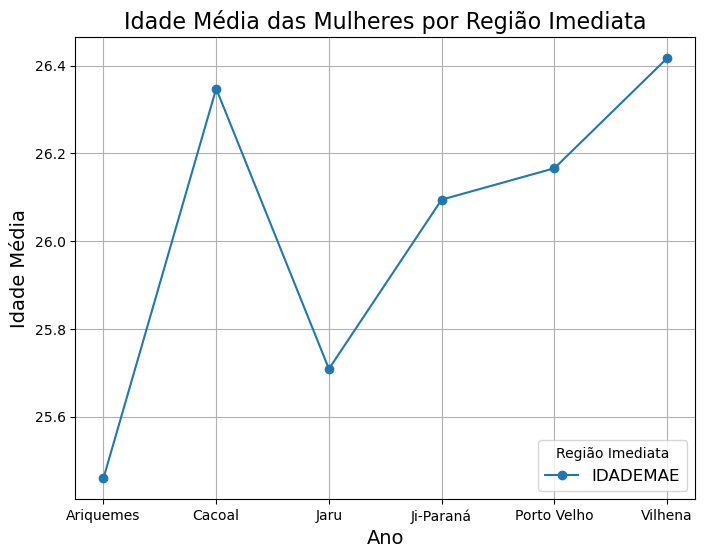

In [26]:
ax = idade_media_por_regiao.plot(figsize=(8, 6), marker='o')

# Adicionando título e rótulos dos eixos
ax.set_title('Idade Média das Mulheres por Região Imediata', fontsize=16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Idade Média', fontsize=14)

# Adicionando legenda
ax.legend(title='Região Imediata', fontsize=12)

# Adicionando uma grade
ax.grid(True)

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [27]:
dados_extras = pd.read_csv('dados_extras_ro.csv' , sep = ';' , encoding = 'latin 1')

In [28]:
dados_extras.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [29]:
idh_ro = dados_extras[['municipio' , 'idh']]

In [30]:
def categorizacao (idh):
    categoria = []
    for i in idh:
        if i >= 0.800:
            categoria.append('IDH muito alto')
        elif 0.700 <= i < 0.800:
            categoria.append('IDH alto')
        elif 0.600 <= i < 0.700:
            categoria.append('IDH médio')
        elif 0.500 <= i < 0.600:
            categoria.append('IDH baixo')
        elif i < 0.500:
            categoria.append('IDH muito baixo')
        else:
            categoria.append('Categoria não encontrada')

    return categoria

In [31]:
idh_ro['faixa idh'] = categorizacao(idh_ro['idh'])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5404\2560748927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idh_ro['faixa idh'] = categorizacao(idh_ro['idh'])


In [32]:
idh_ro.head()

,municipio,idh,faixa idh
0,Alta Floresta D'Oeste,0.641,IDH médio
1,Alto Alegre dos Parecis,0.592,IDH baixo
2,Alto Paraíso,0.625,IDH médio
3,Alvorada D'Oeste,0.643,IDH médio
4,Ariquemes,0.702,IDH alto


In [33]:
mapping_faixas = {
    'IDH muito baixo': 'Condições precárias',
    'IDH baixo': 'Rever políticas públicas',
    'IDH médio': 'Melhorar condições',
    'IDH alto': 'Boas condições',
    'IDH muito alto': 'Condições perfeitas'
}

In [34]:
idh_ro = idh_ro.set_index('faixa idh')

In [35]:
condicoes_idh = idh_ro.groupby(mapping_faixas)['idh']

In [36]:
condicoes_idh.agg(funcoes)

,sum,mean,max,min,median,std,var
faixa idh,,,,,,,
Boas condições,5.011,0.715857,0.736,0.700,0.714,0.013668,0.000187
Melhorar condições,23.157,0.643250,0.692,0.607,0.643,0.024046,0.000578
Rever políticas públicas,5.322,0.591333,0.598,0.584,0.592,0.004848,0.000024


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [37]:
ifdm_ro = dados_extras[['municipio' , 'ifdm']]

In [38]:
ifdm_ro.head()

,municipio,ifdm
0,Alta Floresta D'Oeste,0.6337
1,Alto Alegre dos Parecis,0.5046
2,Alto Paraíso,0.5735
3,Alvorada D'Oeste,0.5919
4,Ariquemes,0.7746


In [39]:
def categoria_ifdm (ifdm):
    
    categoria = []
    
    for i in ifdm:
        if i > 0.8:
            categoria.append('Alto')
        elif 0.6 <= i <= 0.8:
            categoria.append('Moderado')
        elif 0.4 <= i <= 0.6:
            categoria.append('Regular')
        elif i < 0.4:
            categoria.append('Baixo')
        else:
            categoria.append('Categoria não encontrada')
            
    return categoria

In [40]:
ifdm_ro['faixa ifdm'] = categoria_ifdm(ifdm_ro['ifdm'])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5404\1760032360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ifdm_ro['faixa ifdm'] = categoria_ifdm(ifdm_ro['ifdm'])


In [41]:
ifdm_ro.head()

,municipio,ifdm,faixa ifdm
0,Alta Floresta D'Oeste,0.6337,Moderado
1,Alto Alegre dos Parecis,0.5046,Regular
2,Alto Paraíso,0.5735,Regular
3,Alvorada D'Oeste,0.5919,Regular
4,Ariquemes,0.7746,Moderado


In [42]:
mapping_faixas_ifdm = {
    'Baixo': 'Condições precárias',
    'Regular' : 'Rever políticas públicas',
    'Moderado' : 'Condições aceitáveis' ,
    'Alto': 'Boas condições'
}

In [43]:
ifdm_ro = ifdm_ro.set_index('faixa ifdm')

In [44]:
condicoes_ifdm = ifdm_ro.groupby(mapping_faixas_ifdm)['ifdm'].agg(funcoes)

In [45]:
condicoes_ifdm

,sum,mean,max,min,median,std,var
faixa ifdm,,,,,,,
Condições aceitáveis,17.1579,0.659919,0.7746,0.6006,0.64615,0.048485,0.002351
Rever políticas públicas,14.4654,0.556362,0.5973,0.4562,0.56415,0.034401,0.001183


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [76]:
pib_ro = dados_extras[['municipio' , 'pib']]

In [77]:
def classifica_pib(series):
    classificacao = []
    for valor in series:
        if valor > 1000000:
            classificacao.append('Acima de 1 bilhão')
        elif valor > 500000:
            classificacao.append('Acima de 500 milhões')
        elif valor > 300000:
            classificacao.append('Acima de 300 milhões')
        elif valor > 200000:
            classificacao.append('Acima de 200 milhões')
        elif valor > 100000:
            classificacao.append('Acima de 100 milhões')
        else:
            classificacao.append('Abaixo de 100 milhões')
    return classificacao

In [78]:
pib_ro['faixa pib'] = classifica_pib(pib_ro['pib'])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5404\2201849346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_ro['faixa pib'] = classifica_pib(pib_ro['pib'])


In [79]:
pib_ro.head()

,municipio,pib,faixa pib
0,Alta Floresta D'Oeste,496000,Acima de 300 milhões
1,Alto Alegre dos Parecis,213410,Acima de 200 milhões
2,Alto Paraíso,358000,Acima de 300 milhões
3,Alvorada D'Oeste,204098,Acima de 200 milhões
4,Ariquemes,2579830,Acima de 1 bilhão


In [80]:
mapping = {'Acima de 1 bilhão' : 'Alto desenvolvimento',
           'Acima de 500 milhões' : 'Alto desenvolvimento',
           'Acima de 300 milhões' : 'Médio desenvolvimento',
           'Acima de 200 milhões' : 'Médio desenvolvimento',
           'Acima de 100 milhões' : 'Baixo desenvolvimento',
           'Até 100 milhões' : 'Baixo desenvolvimento'
          }

In [81]:
pib_ro2 = pib_ro.set_index('faixa pib')

In [82]:
pib_fx = pib_ro2.groupby(mapping)['pib'].agg(funcoes)

In [83]:
pib_fx

,sum,mean,max,min,median,std,var
faixa pib,,,,,,,
Alto desenvolvimento,39228892,2.307582e+06,17912070,507000,893000.0,4.136029e+06,1.710674e+13
Baixo desenvolvimento,2365515,1.478447e+05,190331,105208,144314.0,2.815915e+04,7.929379e+08
Médio desenvolvimento,3560481,3.236801e+05,496000,204098,353000.0,9.919668e+04,9.839982e+09


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [133]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [299]:
esc_ro = pd.merge(sinasc_raw[['ESCMAE' , 'munResNome']] , 
                  pib_ro[['municipio' , 'faixa pib']] , 
                  right_on= 'municipio' ,
                  left_on= 'munResNome'
                 )

In [300]:
esc_ro.drop(columns = 'municipio' , inplace = True)

In [302]:
esc_ro['ESCMAE'].fillna('Nenhuma', inplace=True)

In [303]:
esc_ro = esc_ro.pivot_table('ESCMAE' ,
                  index = 'faixa pib' ,
                  aggfunc = 'count')

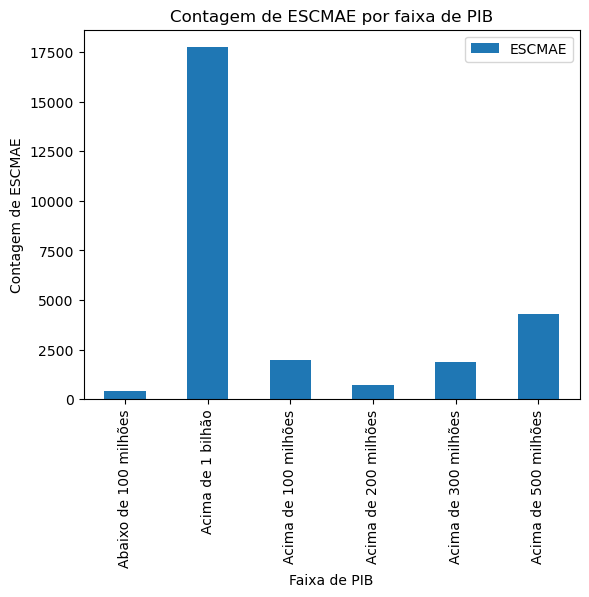

In [304]:
esc_ro.plot(kind='bar')
plt.title('Contagem de ESCMAE por faixa de PIB')
plt.xlabel('Faixa de PIB')
plt.ylabel('Contagem de ESCMAE')
plt.show()

Observei que os municipios com PIB acima de 1 bilhão possuem maior quantidade de escolaridade das mães. E apesar de possuir um PIB menor, os municipios com PIB acima de 100 milhões tem um valor semelhante a municipios com produto interno bruto acima de 300 milhões.